In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/Users/abdullahmunir/Desktop/ATOMCAMP/Python/Deep Learning /In Class Activity - Deep Learning/students_adaptability_level_online_education.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
# Summary statistics for numerical attributes (if any)
numerical_summary = data.describe()

# Value counts for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_value_counts = {column: data[column].value_counts() for column in categorical_columns}

numerical_summary, categorical_value_counts


(       Gender    Age Education Level Institution Type IT Student Location  \
 count    1205   1205            1205             1205       1205     1205   
 unique      2      6               3                2          2        2   
 top       Boy  21-25          School   Non Government         No      Yes   
 freq      663    374             530              823        901      935   
 
        Load-shedding Financial Condition Internet Type Network Type  \
 count           1205                1205          1205         1205   
 unique             2                   3             2            3   
 top              Low                 Mid   Mobile Data           4G   
 freq            1004                 878           695          775   
 
        Class Duration Self Lms  Device Adaptivity Level  
 count            1205     1205    1205             1205  
 unique              3        2       3                3  
 top               1-3       No  Mobile         Moderate  
 freq     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Preprocessing the data
# One-hot encoding for categorical features
onehot_encoder = OneHotEncoder()
X = onehot_encoder.fit_transform(data[categorical_columns.drop('Adaptivity Level')])

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Adaptivity Level'])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((964, 35), (241, 35), (964,), (241,))

In [ ]:
# Convert the sparse matrix to a dense array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [ ]:
# Further split the training data for validation (assuming X_train and y_train are already defined)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 units for 3 classes in the output layer

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Training the model - setting epochs to 20
history = model.fit(X_train_sub, y_train_sub, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.9433 - accuracy: 0.5318 - val_loss: 0.9354 - val_accuracy: 0.5181
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.8569 - accuracy: 0.6057 - val_loss: 0.8541 - val_accuracy: 0.5907
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.7870 - accuracy: 0.6744 - val_loss: 0.8081 - val_accuracy: 0.6166
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.7125 - accuracy: 0.6978 - val_loss: 0.7918 - val_accuracy: 0.6218
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.7211 - val_loss: 0.7698 - val_accuracy: 0.6632
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.7652 - val_loss: 0.8042 - val_accuracy: 0.6373
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7652 - val_loss: 0.7383 - val_accuracy: 0.6684
Epoch 8/20
25/25 [==

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


8/8 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8091
Test Loss: 0.4512941837310791
Test Accuracy: 0.8091286420822144


Visualizing Bias and Variance (Before Hyperparameter Tuning)

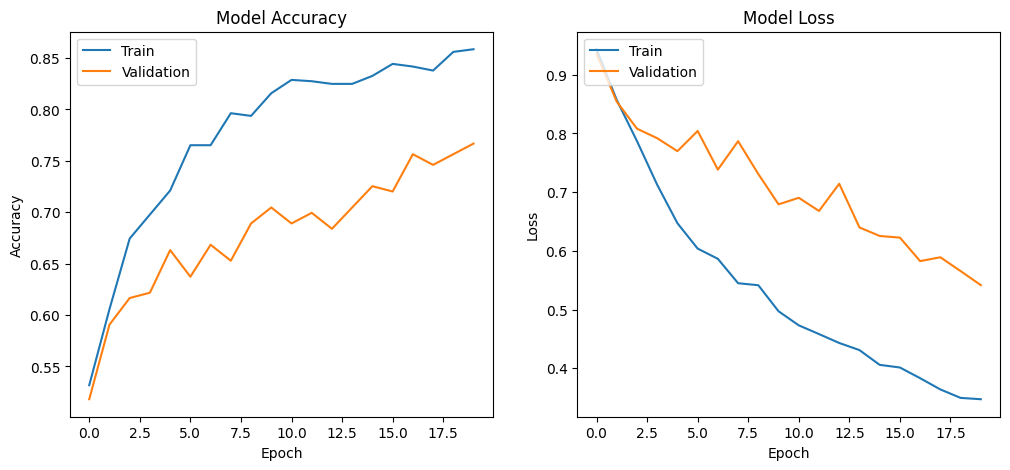

In [ ]:
import matplotlib.pyplot as plt


# Summarize history for accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


There Seems to be a low bias and high variance at this point, so we increase number of epochs first

In [ ]:
# Retraining the model - setting epochs to 30 this time
history = model.fit(X_train_sub, y_train_sub, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8794 - val_loss: 0.5475 - val_accuracy: 0.7617
Epoch 2/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8651 - val_loss: 0.5182 - val_accuracy: 0.7617
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8703 - val_loss: 0.5126 - val_accuracy: 0.7979
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8846 - val_loss: 0.5207 - val_accuracy: 0.7772
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8729 - val_loss: 0.4809 - val_accuracy: 0.8187
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8781 - val_loss: 0.4984 - val_accuracy: 0.7979
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.8911 - val_loss: 0.5259 - val_accuracy: 0.7617
Epoch 8/30
25/25 [==

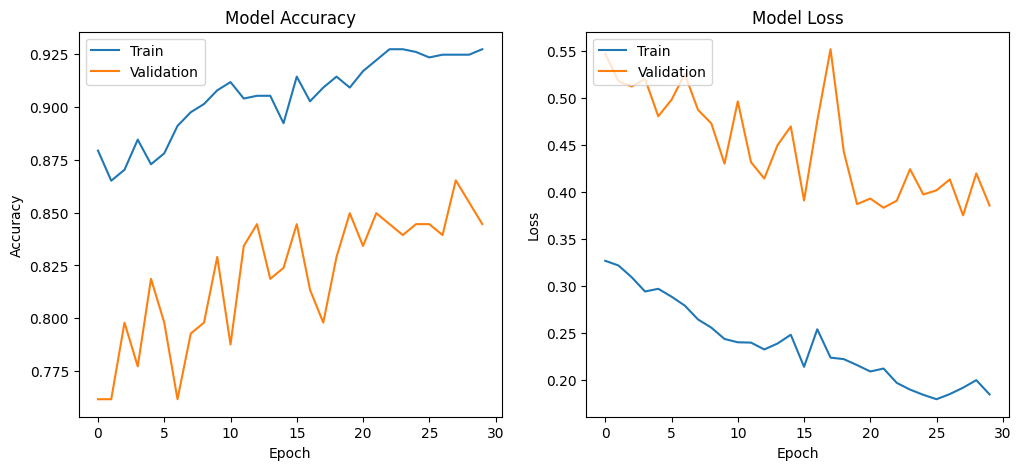

In [ ]:
# Visualizing aftert Hyperparameter tuning
# Summarize history for accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Noticable Gap between training and Validation Accuracy, whicyh might be a sign of Overfitting. So we will apply L2 Regularization

In [ ]:
from tensorflow.keras.regularizers import l2


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.001)))


In [ ]:
# Compiling the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model - you can adjust epochs and batch size as needed
history = model.fit(X_train_sub, y_train_sub, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_dense, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/30
25/25 [==============================] - 1s 5ms/step - loss: 1.0813 - accuracy: 0.5253 - val_loss: 0.9824 - val_accuracy: 0.5440
Epoch 2/30
25/25 [==============================] - 0s 1ms/step - loss: 0.9374 - accuracy: 0.6368 - val_loss: 0.9302 - val_accuracy: 0.5751
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.8579 - accuracy: 0.6732 - val_loss: 0.9051 - val_accuracy: 0.6114
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.8001 - accuracy: 0.6874 - val_loss: 0.8610 - val_accuracy: 0.6321
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.7621 - accuracy: 0.7237 - val_loss: 0.8415 - val_accuracy: 0.6425
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.7263 - val_loss: 0.8294 - val_accuracy: 0.6477
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.7588 - val_loss: 0.8061 - val_accuracy: 0.6839
Epoch 8/30
25/25 [==

In [ ]:
# Compiling the model again and running it again for more epochs (More is better)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model - you can adjust epochs and batch size as needed
history = model.fit(X_train_sub, y_train_sub, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_dense, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/20
25/25 [==============================] - 1s 5ms/step - loss: 0.3881 - accuracy: 0.9014 - val_loss: 0.6012 - val_accuracy: 0.7979
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.9183 - val_loss: 0.5891 - val_accuracy: 0.7927
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.9183 - val_loss: 0.5748 - val_accuracy: 0.8083
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.9235 - val_loss: 0.5791 - val_accuracy: 0.7979
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.9235 - val_loss: 0.5726 - val_accuracy: 0.8187
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.9235 - val_loss: 0.5496 - val_accuracy: 0.8238
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.9196 - val_loss: 0.5629 - val_accuracy: 0.8187
Epoch 8/20
25/25 [==

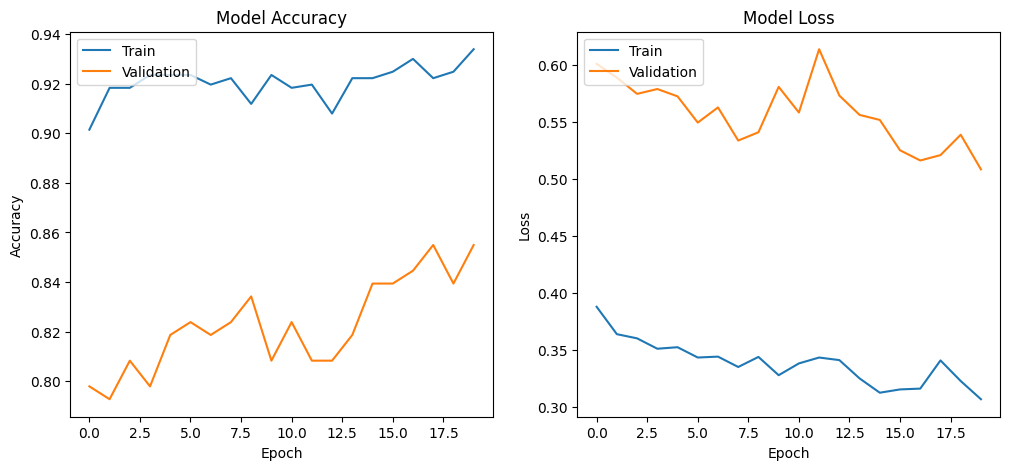

In [ ]:

# Checking model stats after tuning
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Model ValidationAccuracy has increase by more than 1%, which is a win for all of us,

Using different machine learning algorithms to go against the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.8962655601659751,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.65      0.73        23\n           1       0.92      0.92      0.92       103\n           2       0.88      0.92      0.90       115\n\n    accuracy                           0.90       241\n   macro avg       0.88      0.83      0.85       241\nweighted avg       0.90      0.90      0.89       241\n')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_predictions = (model.predict(X_test_dense) > 0.5).astype("int32")


8/8 [==============================] - 0s 664us/step


In [ ]:
confusion_matrix(y_test, X_predictions)


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
# Evaluation perimeters
print(classification_report(y_test, X_predictions))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets